# Final Project! (Part 1: follow tutorial)
## Evan Egan, astr-19 fall 2025

In [2]:
import numpy as np
import sep

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
data = fits.open('image.fits')[0].data
# Using fits (astropy) over fitsio
# using [0].data extracts the .data array instead of the whole file
# fitsio does this automatically but astropy doesn't :sob:

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


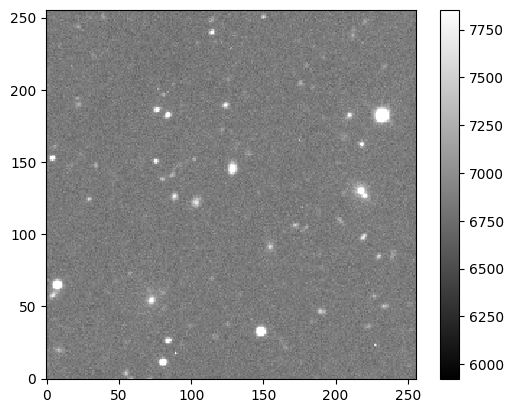

In [5]:
#show image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
#show image with nearest interp, gray color map, data min as min, data max as max, and origin starting from the bottom
plt.colorbar()
# Color bar on the right.
plt.savefig("final_image.png")

### Success

In [6]:
bkg = sep.Background(data)
# begin background subtraction

In [7]:
print(bkg.globalback)
print(bkg.globalrms)
# this gets a global mean and noise of data

6852.04931640625
65.46174621582031


In [8]:
bkg_image = bkg.back()
# turns background to a 2-d array and fits it to original image
# same as going np.array()

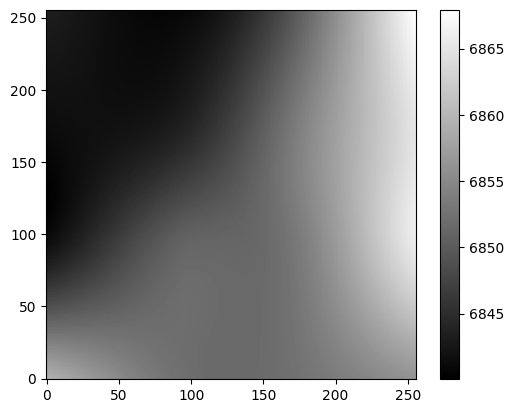

In [9]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
#background plotting and visualization
plt.colorbar()
#color bar :)
plt.savefig("final_background_image")

In [10]:
bkg_rms = bkg.rms()
# again, background noise this time though.

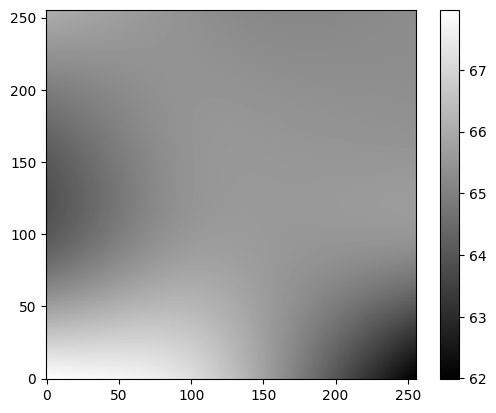

In [11]:
# background noise plotting and visualization
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
# color bar :)
plt.savefig('final_background_noise.png')

#### Now that we have both the background noise plotted and the background plotted, we can subtract the two

In [12]:
data_sub = data - bkg

Now we can run object detection on the data becasue there's no background!

In [13]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
# Extracting from the subtracted background data, using 1.5 sigma as the threshold, and sigma represents bkg.globalrms.

In [14]:
# how many objects were detected
# objects is built into numpy
len(objects)
print(f"Number of objects: {len(objects)}")
# somehow there's 1 less than the tutorial... ghouls possibly

Number of objects: 68


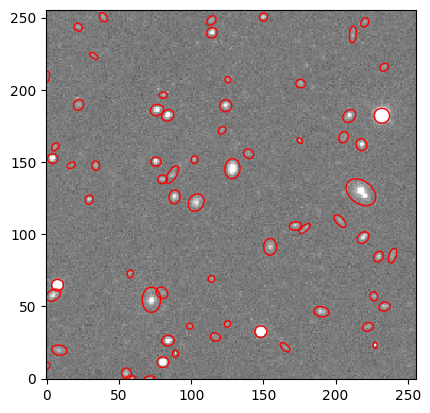

In [15]:
from matplotlib.patches import Ellipse

#fig, ax, 2 subplots created from the background subtracted image
#show the subtracted image with same dimensions as previous
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
# uses matplotlib's built in patches.
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('final_image_objects.png')

For some reason, the code doesn't recognize a single cell as its own anomaly and combines 2... approximately around 100,150. Ghouls, as I said previously.

In [16]:
objects.dtype.names
# check out all the fields that you can use here for objects.

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [22]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
# perform simple photometry. uses sep.sum_circle as circular aperture photometry. There's a 3 pixel radius, taking in the objects X value and the objects Y value from the previous cells.

In [18]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.157852 +/- 291.027799
object 1: flux = 3092.217500 +/- 291.592199
object 2: flux = 5949.861113 +/- 356.561993
object 3: flux = 1851.419824 +/- 295.028805
object 4: flux = 72736.380312 +/- 440.172199
object 5: flux = 3860.756895 +/- 352.163163
object 6: flux = 6418.902715 +/- 357.458957
object 7: flux = 2210.714238 +/- 350.791233
object 8: flux = 2741.609297 +/- 352.277749
object 9: flux = 20916.877363 +/- 376.966141
